### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explore Titanic Data

In [ ]:
# import pandas library
import pandas as pd

# Import data
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MySkill/Python for Data Science/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Variable Notes

**PassengerId** Unique ID of the passenger

**Survived** Survived (1) or died (0)

**Pclass** Passenger's class (1st, 2nd, or 3rd)

**Name** Passenger's name

**Sex** Passenger's sex

**Age** Passenger's age

**SibSp** Number of siblings/spouses aboard the Titanic

**Parch** Number of parents/children aboard the Titanic

**Ticket** Ticket number

**Fare** Fare paid for ticket

**Cabin** Cabin number

**Embarked** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [ ]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n=================================")
print(f"DataFrame info : {titanic_df.info()}\n=================================")
print(f"DataFrame columns : {titanic_df.columns}\n=================================")
print(f"The type of each column : {titanic_df.dtypes}\n=================================")
print(f"How much missing value in every column : {titanic_df.isna().sum()}\n=================================")

DataFrame shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DataFrame info : None
DataFrame columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The type of each colu

First some basic questions:
```
1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
```

## 1. Who were the passengers on the titanic?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
plt.style.use("fivethirtyeight")

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


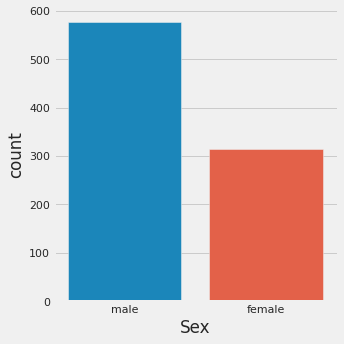

In [ ]:
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot('Sex', data=titanic_df, kind='count')

In [ ]:
titanic_df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


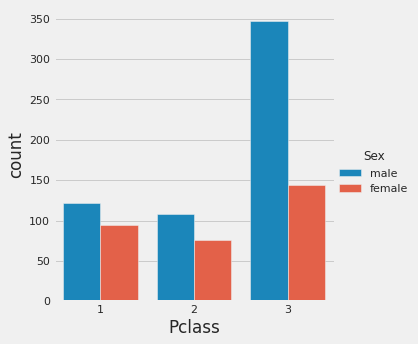

In [ ]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot('Pclass', data=titanic_df, hue='Sex', kind='count')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males, females, and children. How can we go about this?

In [ ]:
# Create a new column 'Person' in which every person under 16 is child.

titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'

In [ ]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,female
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,male
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,female
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S,Child


In [ ]:
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n=================================")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=================================")
print(f"Mean age : {titanic_df.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : male      537
female    271
Child      83
Name: Person, dtype: int64
Mean age : 29.69911764705882


Excellent! Now we have seperated the passengers between female, male, and child. This will be important later on beacuse of the famous "Women and children first policy"!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


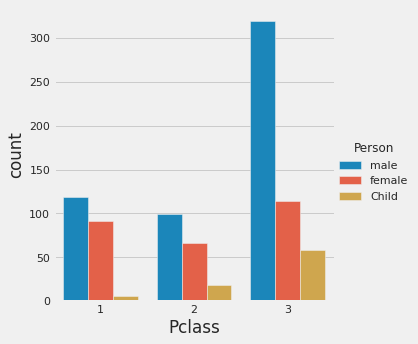

In [ ]:
sns.catplot('Pclass', data=titanic_df, hue='Person', kind='count')

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

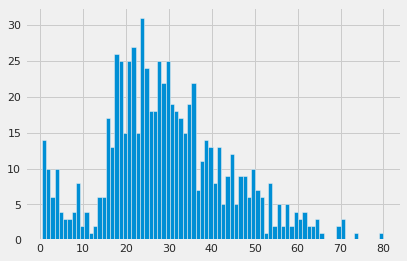

In [ ]:
# visualizing age distribution
titanic_df.Age.hist(bins=80)

## 2. What deck were the passengers on and how does that relate to their class?

In [ ]:
# visualizing the dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64

In [ ]:
titanic_df.shape

(891, 13)

In [ ]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A, B, C, D, E, F, G)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


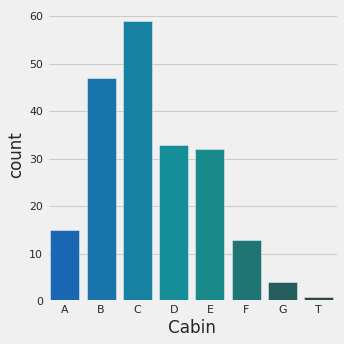

In [ ]:
# let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')


In [ ]:
cabin_df.head()

,Cabin
106,A
33,A
41,A
97,A
146,A


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


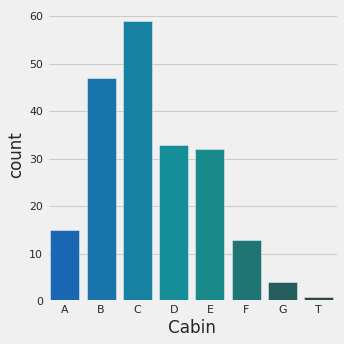

In [ ]:
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


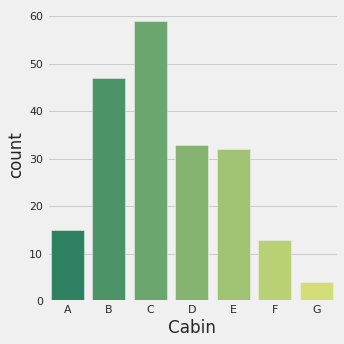

In [ ]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin', data=cabin_df, kind='count', palette='summer')

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question.

## 3. Where did the passengers come from?

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


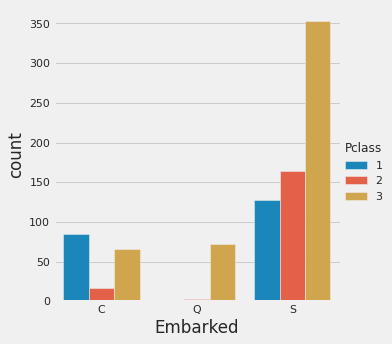

In [ ]:
# Now we can make a quick factorplot to check out the results, note the 
# order argument, used to deal with NaN values

sns.catplot('Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

## 4. Who was alone and who was with family?

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [ ]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [ ]:
# Look for > 0 or == 0 to set alone status
titanic_df.loc[titanic_df['Alone'] > 0, 'Alone'] = 'with Family'
titanic_df.loc[titanic_df['Alone'] == 0, 'Alone'] = 'Alone'

In [ ]:
# Let's check to make sure it worked
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C,male,Alone
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q,male,Alone
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,male,Alone
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,male,Alone
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,female,with Family


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


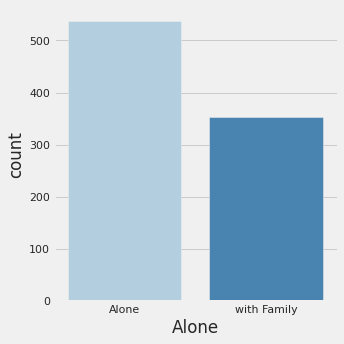

In [ ]:
# Now let's get a simple visualization!
sns.catplot('Alone', data=titanic_df, kind='count', palette='Blues', 
            order=['Alone', 'with Family'])

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8efb35ba-809e-4a06-9efd-c4a960e744bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>